In [35]:
import pandas as pd
import seaborn as sns
col_names = ['Target','Alcohol','Malic_acid','Ash','Ash_Alcalinity','Magnesium','Total_phenols',
 'Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue',
 'OD280/OD315_of_diluted wines','Proline']

In [36]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=col_names, index_col=False)
df.head()

,Target,Alcohol,Malic_acid,Ash,Ash_Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
df.describe()

,Target,Alcohol,Malic_acid,Ash,Ash_Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target                        178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Ash_Alcalinity                178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted wines  178 non-null    float64
 13  Proli

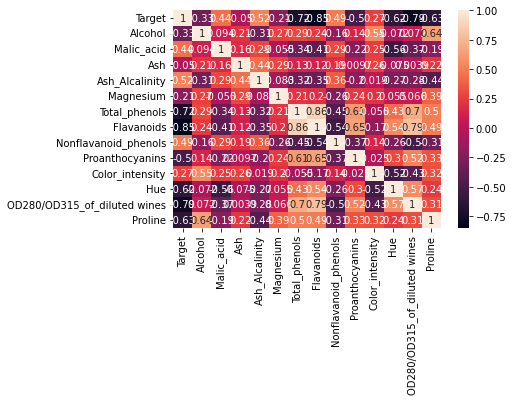

In [39]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)
plt.show()



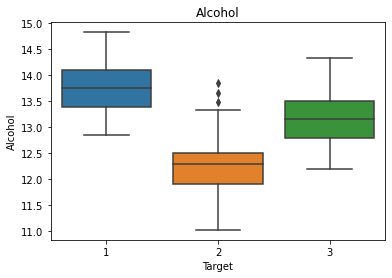

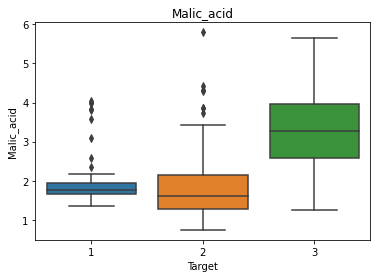

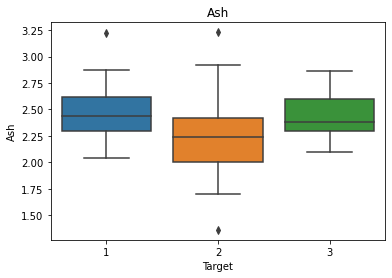

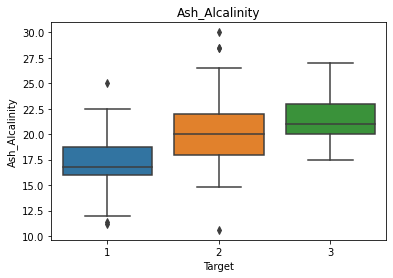

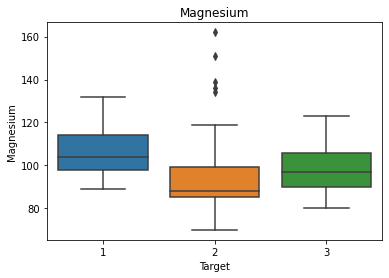

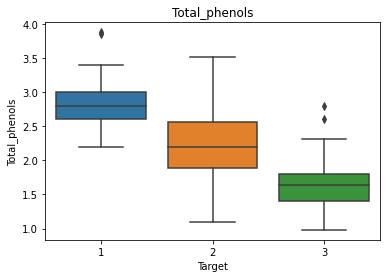

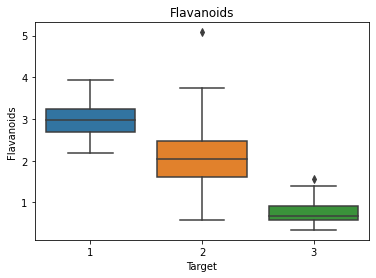

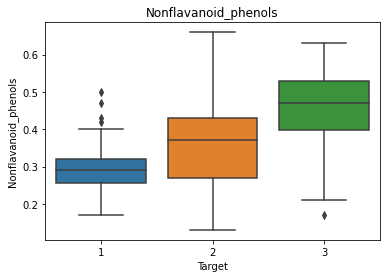

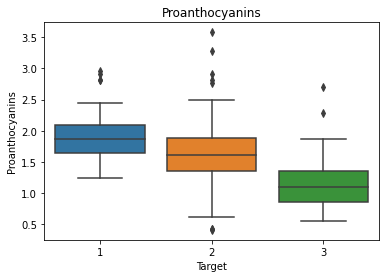

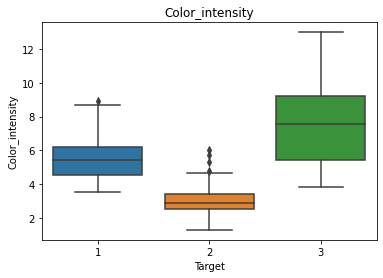

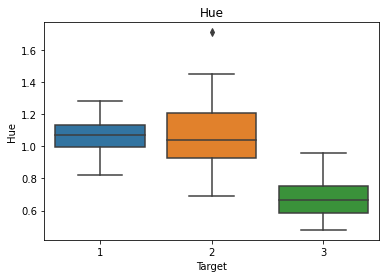

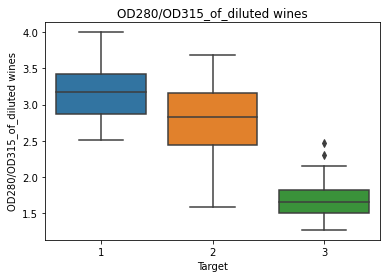

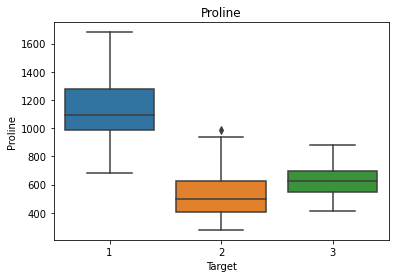

In [40]:
for name in col_names[1:]:
  _ = sns.boxplot(x='Target',y=name,data=df).set_title(name)
  plt.show()

In [41]:
X = df.drop('Target',axis=1)
y = df['Target']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

[[18  0  0]
 [ 1 19  1]
 [ 0  1 14]]


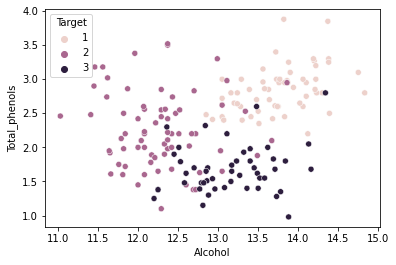

In [43]:
sns.scatterplot(x='Alcohol',y='Total_phenols',hue='Target',data=df)

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
model_1 = SVC(kernel='linear')
model_1.fit(X_train,y_train)
y_pred = model_1.predict(X_test)
m = confusion_matrix(y_test,y_pred)
print(m)

In [44]:
model_1.score(X_test,y_test)

0.9444444444444444

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
model_2 = make_pipeline(scaler,SVC(kernel='linear'))
model_2.fit(X_train,y_train)
y_pred = model_2.predict(X_test)
m = confusion_matrix(y_test,y_pred)
print(m)
model_2.score(X_test,y_test)



[[18  0  0]
 [ 0 20  1]
 [ 0  0 15]]


0.9814814814814815

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
pipeline = make_pipeline(StandardScaler(),PCA(),SVC())
param_grid = {'svc__C':[0.1,1,10,100,1000],
              'svc__gamma':[1,0.1,0.01,0.001,0.0001],
              'pca__n_components':[2,3,4,5,6,7,8,9,10],
              'svc__kernel':['rbf','linear']}
grid = GridSearchCV(pipeline,param_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_score_




0.992

In [59]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
m = confusion_matrix(y_test,y_pred)
print(m)

[[18  0  0]
 [ 1 19  1]
 [ 0  0 15]]
